## 6 학습 관련 기술들

신경망 학습의 핵심 개념

* 가중치 매개변수의 최적값을 탐색하는 최적화 방법. 가중치 매개변수 초기값, 하이퍼파라미터 설정 방법
* 오버피팅 대응책인 가중치 감소, 드롭아웃
* 배치 정규화

### 6.1 매개변수 갱신

- 신경망 학습의 목적: 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것
- 최적화: 매개변수의 최적값을 찾는 문제
- 확률적 경사 하강법(SGD): 매개변수의 기울기를 구해, 기울어진 방향으로 매개변수 값을 갱신하는 일을 몇 번이고 반복해서 최적의 매개변수 값을 찾는 방법

#### 6.1.1 모험가 이야기
- SGD의 전략: 지금 서 있는 장소에서 가장 크게 기울어진 방향으로 가는 것

#### 6.1.2 확률적 경사 하강법(SGD)
##### 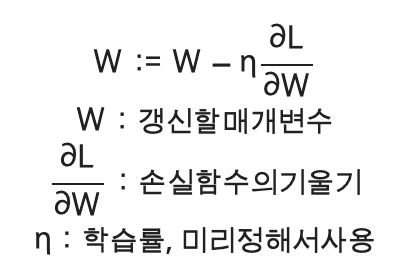
- := : 우변의 값으로 좌변의 값을 갱신하는 표시


In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

- lr: learning rate(학습률)로, 인스턴스 변수로 유지
- update(params, grads): SGD 과정에서 반복해서 불린다
- params[key]와 grads[key]는 각각 가중치 매개변수와 기울기를 저장하고 있다

#### 6.1.3 SGD의 단점

/var/folders/v_/2wq4x7vx0nv2nhrr7tsnjr6r0000gn/T/ipykernel_5526/3384598906.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


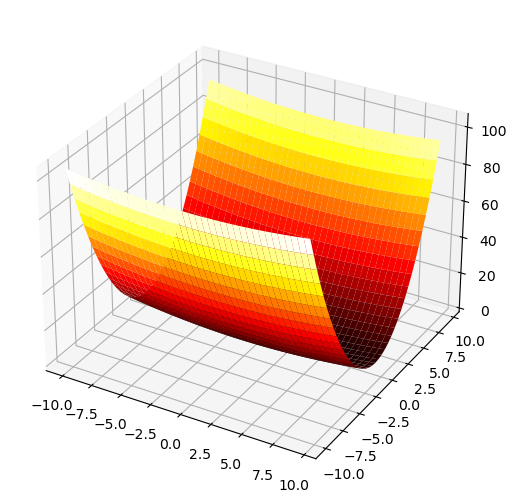

In [4]:
# 그림 6-1 왼쪽 f(x, y) = (1/20) * x**2 + y**2 그래프
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(-10, 10, 0.5)
Y = np.arange(-10, 10, 0.5)
XX, YY = np.meshgrid(X, Y)
ZZ = (1 / 20) * XX**2 + YY**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, cmap='hot');

(-10.0, 10.0)

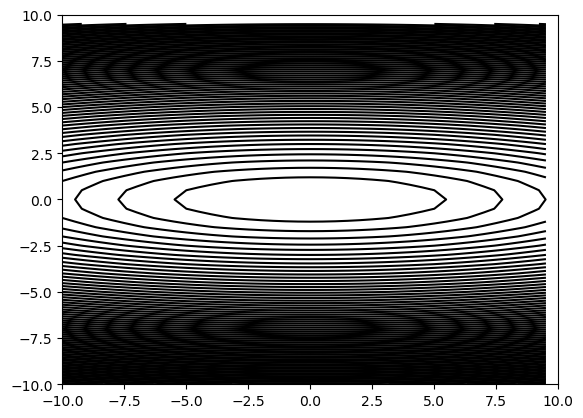

In [5]:
# 그림 6-1 오른쪽 f(x, y) = (1/20) * x**2 + y**2 등고선
plt.contour(XX, YY, ZZ, 100, colors='k')
plt.ylim(-10, 10)
plt.xlim(-10, 10)

In [6]:
# 그림 6-2

def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


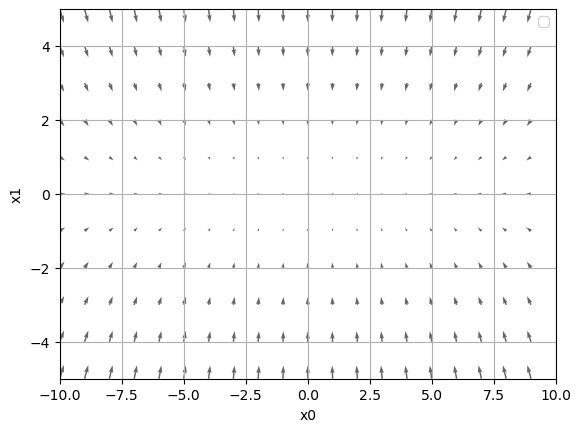

In [8]:
# 그림 6-2 f(x, y) = (1/20) * x**2 + y**2 의 기울기
from mpl_toolkits.mplot3d import Axes3D

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)
     
x0 = np.arange(-10, 10, 1)
x1 = np.arange(-10, 10, 1)
X, Y = np.meshgrid(x0, x1)
    
X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([(1/(20**0.5))*X, Y]) )
    
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-10, 10])
plt.ylim([-5, 5])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

##### 그림 6-2 결과 분석
- y축 방향은 가파른데, x축 방향은 완만하다
- 식의 최솟값이 되는 장소 (x, y) = (0, 0)이지만, 그림 6-2가 보여주는 기울기 대부분은 (0,0)을 가리키지 않는다


##### SGD의 단점
- 비등방성 함수(방향에 따라 성질 or 기울기가 달라지는 함수)에서는 탐색 경로가 비효율적이다
- 지그재그로 탐색하는 근본 원인은 기울어진 방향이 본래의 최솟값과 다른 방향을 가리킨다는 점

- 이러한 SGD의 단점을 개선해주는 **모멘텀, AdaGrad, Adam**이라는 세 방법이 존재한다

#### 6.1.4 모멘텀

##### 모멘텀: 운동량

- **밑의 식**은 기울기 방향으로 힘을 받아 물체가 가속된다는 물리 법칙

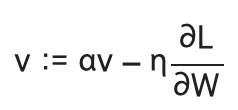

av는 항은 물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할을 한다

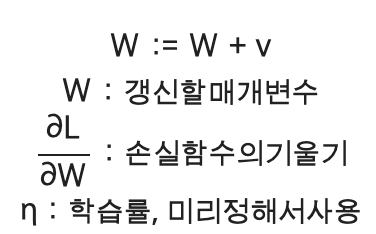

In [12]:
# 모멘텀 구현하기
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

- v: 물체의 속도
- v는 초기화 때는 아무것도 담지 않고, update가 처음 호출될 때 같은 구조의 데이터를 딕셔너리 변수로 저장한다
- 모멘텀의 갱신경로는 공이 그릇 바닥을 구르듯 움직임
- SGD와 비교하면 지그재그 정도가 덜하다

#### 6.1.5 AdaGrad

- 신경망 학습에서는 학습률 값이 중요하다
- 학습률의 값이 너무 작으면 학습 시간이 너무 길어지고, 반대로 너무 크면 발산하기 때문이다
- 학습률 감소: 학습률을 정하는 효과적인 기술로, 학습을 진행하면서 학습률을 점차 줄여가는 방법
    - 처음에는 크게 학습하다가 조금씩 작게 학습하는 것을 의미

##### AdaGrad 정의
- 매개변수 '전체'의 학습률 값을 일괄적으로 낮추는 방법으로, 각각의 매개변수에 맞는 '맞춤형' 값을 만들어주는 방법


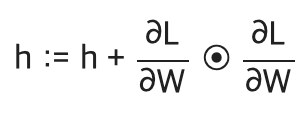

h : 기존 기울기 값을 제곱하여 계속 더해준다

매개변수를 갱신할 때 1/sqrt(h)을 곱해 학습률을 조정한다

AdaGrad는 학습을 진행할 수록 갱신 강도가 약해진다

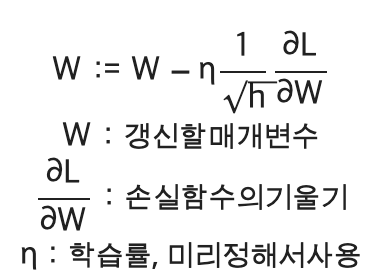

##### AdaGrad의 단점을 보완한 **RMSProp** 방법
- AdaGrad는 과거의 기울기를 제곱하여 게속 더한다. 
- 학습을 진행할수록 갱신 강도가 약해지기 때문에 실제로 무한히 계속 학습한다면 어느 순간 갱신량이 0이 되어 갱신이 불가능한 상태가 된다.
- 이 문제를 개선하기 위해 RMSProp방법이 쓰인다.
- 지수이동평균(Exponential Moving Average, EMA)를 이용하여 먼 과거의 기울기를 서서히 잊고 새로운 기울기 정보를 크게 반영한다

In [13]:
# AdaGrad 구현하기

class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) # 마지막 줄에서 1e-7이라는 작은 값을 더하는 부분이 0으로 나누는 사태 방지

#### 6.1.6 Adam

- 모멘텀: 공이 그릇을 구르는 듯한 물리 법칙에 따르는 움직임
- AdaGrad: 매개변수의 원소마다 적응적으로 갱신 정도를 조정한다
- Adam: 모멘텀과 Adagrad 기법을 융합
- 매개변수 공간을 효율적으로 탐색. 하이터파라미터의 '편향 보정'이 진행된다
- Adam의 구현

In [14]:
# Adam 구현하기

class Adam:

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            

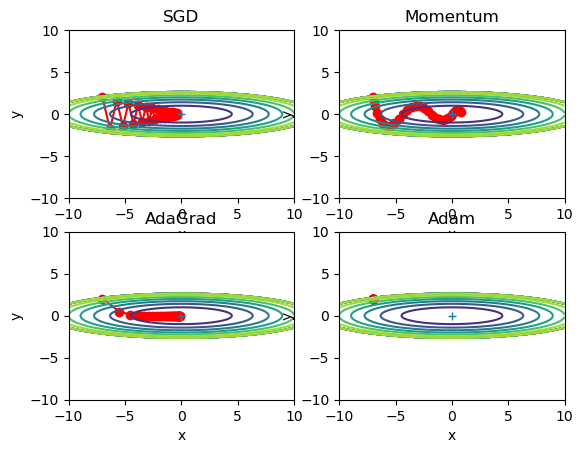

In [15]:
#### 6.1.7 어느 갱신 방법을 이용할 것인가?

import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

def f(x, y):
    return x**2 / 20.0 + y**2

def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

##### 결과 해석:
- 문제가 무엇이냐에 따라 사용할 기법이 달라진다
- 하이퍼 파라미터를 어떻게 설정하느냐에 따라서 결과도 바뀐다
- 모든 문제에서 항상 뛰어난 기법은 아직 없다
- 이 책에서는 SGD, Adam을 많이 사용한다

===========iteration:0===========
SGD:2.374004718718772
Momentum:2.338602801456563
AdaGrad:2.0655225272066344
Adam:2.471707111497338
===========iteration:100===========
SGD:1.691799713606043
Momentum:0.46869985396201075
AdaGrad:0.2030369006169938
Adam:2.37317328126242
===========iteration:200===========
SGD:0.7736484036823343
Momentum:0.18681538687164137
AdaGrad:0.06637925852214198
Adam:2.417037730925631
===========iteration:300===========
SGD:0.6044768116214714
Momentum:0.2583556630724733
AdaGrad:0.10321229122911113
Adam:2.3952938392297676
===========iteration:400===========
SGD:0.44431146488443074
Momentum:0.21892155937266689
AdaGrad:0.06870241950854836
Adam:2.3936756943955046
===========iteration:500===========
SGD:0.38410879053317126
Momentum:0.13193827853795848
AdaGrad:0.05291376204429914
Adam:2.372968460800993
===========iteration:600===========
SGD:0.3727769155653413
Momentum:0.08202168409071724
AdaGrad:0.05246996238676668
Adam:2.445605556743625
===========iteration:700=========

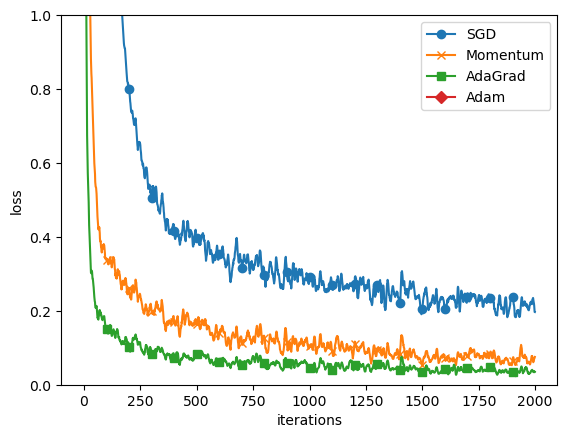

In [17]:
import os
import sys
sys.path.append(os.pardir)

import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
#from common.optimizer import *

# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    

# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

##### 출력 결과: 
- 각 층이 100개의 뉴런으로 구성된 5층 신경망에서 ReLU를 활성화 함수로 사용해 측정하였다
- 하이퍼파라미터인 학습률과 신경망의 구조(층 깊이 등)에 따라 결과가 달라진다
- 일반적으로 SGD보다 다른 세 기법이 빠르게 학습하고, 때로는 최종 정확도도 높다

### 6.2 가중치의 초기값

- 가중치의 초기값을 무엇으로 설정하느냐가 신경망 학습의 성패를 가른다

#### 6.2.1 초기값을 0으로 하면?

- 가중치 감소(weight decay)
    - 가중치 매개변수 값이 작아지도록 학습하는 방법
    - 가중치 값을 작게 하여 오버피팅이 일어나지 않는다


* 초깃값을 작게 하기 위해 0.01 * np.random.randn(10,100) 처럼 정규분포로 생성된 값에 0.01을 곱함

- 초깃값을 모두 0으로 해서는 안되는 이유?
    * 오차역전법에서 모든 가중치의 값이 똑같이 갱신되기 때문이다


* 순전파: 입력파의 가중치가 0이기 때문에 두 번째 층의 뉴런에 모두 같은 값이 전달
- 역전파: 가중치가 모두 똑같이 갱신

#### 6.2.2 은닉층의 활성화값 분포
가중치의 초기값에 따라 은닉층 활성화 값들이 어떻게 변화는지 실험해보자

##### 표준편차가 1일 때

In [20]:
##### 표준편차가 1일 때

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

def get_activation(hidden_layer_size, x, w, a_func=sigmoid):
    for i in range(hidden_layer_size):
        if i != 0:
            x = activations[i-1]

        a = np.dot(x, w)

        # 활성화 함수도 바꿔가며 실험해보자！
        z = a_func(a)
        # z = ReLU(a)
        # z = tanh(a)

        activations[i] = z
    return activations
    
# 초깃값을 다양하게 바꿔가며 실험해보자！
w = np.random.randn(node_num, node_num) * 1
# w = np.random.randn(node_num, node_num) * 0.01
# w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
# w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

z = sigmoid
# z = ReLU
# z = tanh

activations = get_activation(hidden_layer_size, x, w, z)

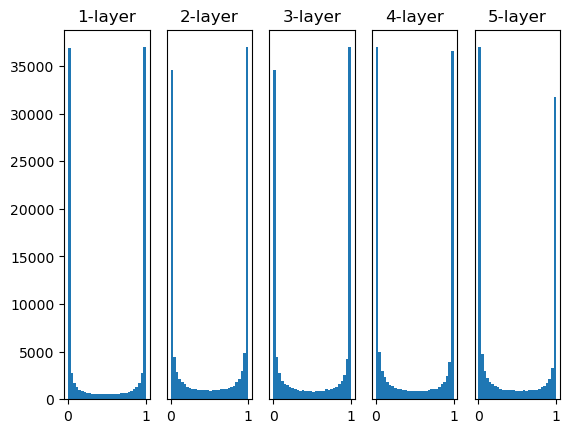

In [21]:
# 히스토그램 그리기
def get_histogram(activations):
    for i, a in activations.items():
        plt.subplot(1, len(activations), i+1)
        plt.title(str(i+1) + "-layer")
        if i != 0: plt.yticks([], [])
        # plt.xlim(0.1, 1)
        # plt.ylim(0, 7000)
        plt.hist(a.flatten(), 30, range=(0,1))
    plt.show()

get_histogram(activations)

##### 출력 결과:
기울기 소실(gradient vanishing) 문제 밟생

데이터가 0과 1에 치우쳐 분포하게 되면 역전파 기울기 값이 점점 작아지다 사라진다

가중치의 표준편차를 **0.01**로 변경하자.

##### 표준편차가 0.01일 때

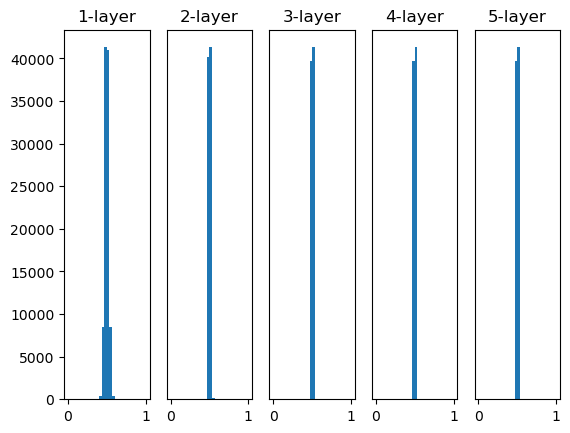

In [22]:
w = np.random.randn(node_num, node_num) * 0.01
activations = get_activation(hidden_layer_size, x, w, z)
get_histogram(activations)

##### 출력 결과: 
0.5 부근에 집중. 활성화값들이 치우쳤다는 것은 표현력 관점에서 큰 문제

표현력을 제한: 예를 들어 뉴런 100개가 거의 같은 값을 출력한다면 뉴런 1개짜리와 별반 다를게 없음

##### Xavier 초기값 사용
앞 계층의 노드가 n개라면 표준편차가 1 / np.sqrt(n)인 정규분포를 사용한다

사비에르 논문은 앞 층의 노드 수 외에 다음 출력 노드 수도 고려한 설정 값 제안하였다

카페 등의 프레임워크는 앞층의 입력 노드만으로 계산하도록 단순화되어있다

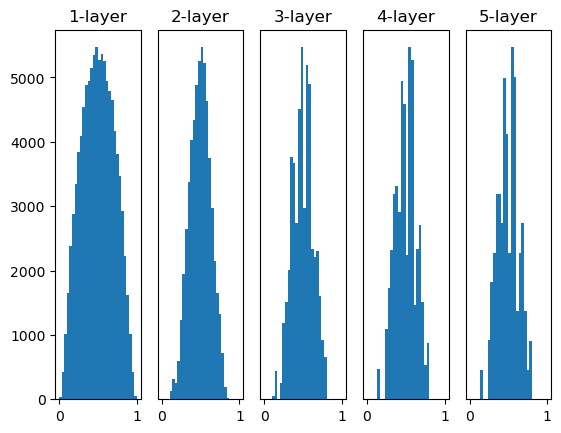

In [23]:
# Xavier 초기값
w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
activations = get_activation(hidden_layer_size, x, w, z)
get_histogram(activations)

##### 출력 결과:
- 층이 깊어지면서 형태가 다소 일그러지지만, 넓게 분포되었다
- 시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 이루어진다

#### 6.2.3 ReLU를 사용할 때의 가중치 초기값

sigmoid, tanh는 좌우 대칭이라 **Xavier 초기값**이 적당하다

**He 초기값**: ReLu에 특화된 초기값

앞 계층의 노드가 n일 때 표준편차가 2 / np.sqrt(n)인 정규분포를 사용한다

##### 표준편차 0.01 사용

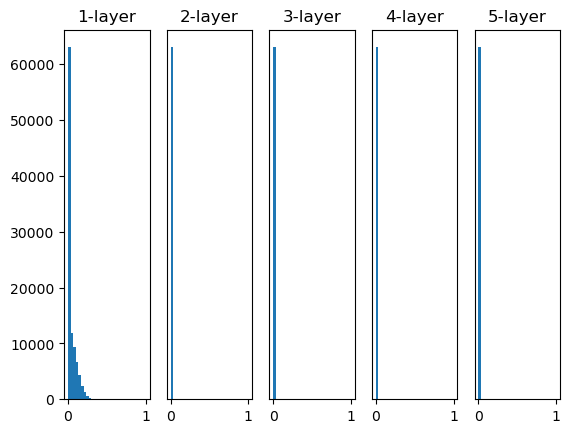

In [25]:
# 표준편차가 0.01인 정규분포를 가중치 초기값으로 사용한 경우
w = np.random.randn(node_num, node_num) * 0.01
z = ReLU
activations = get_activation(hidden_layer_size, x, w, z)
get_histogram(activations)

##### Xavier 초기값 사용

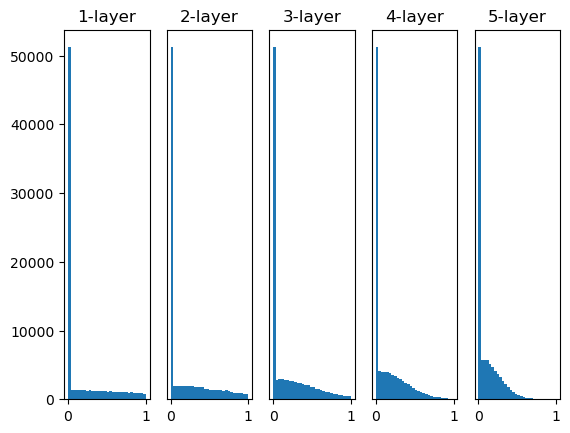

In [26]:
# Xavier 초기값을 사용한 경우
w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
activations = get_activation(hidden_layer_size, x, w, z)
get_histogram(activations)

##### He 초기값 사용

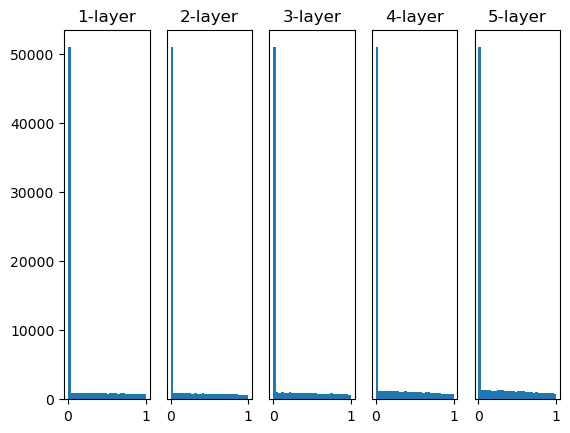

In [27]:
# He 초기값을 사용한 경우
w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
activations = get_activation(hidden_layer_size, x, w, z)
get_histogram(activations)

##### 출력 결과:
* std = 0.01일 때
    * 각 층의 활성화 값들이 아주 작은 값들. 역전파의 가중치의 기울기 역시 작아진다. 실제로 학습이 거의 이뤄지지 않음
---
* Xavier 초기값일 때
    * 층이 깊어지면 활성화값들이 치우친다. 학습할 때 '기울기 소실'문제 발생
---
* He 초기값일 때
    * 모든 층에서 균일하게 분포한다
---
##### 결과 분석:
* 활성화 함수로 ReLU를 사용할 때 He 초기값 사용
* 활성화 함수로 sigmoid, tanh 등 S자 모양 곡선일 때는 Xavier 초기값 사용

#### 6.2.4 MNIST 데이터셋으로 본 가중치 초기값
##### 실제 데이터로 가중치의 초기값을 주는 방법이 신경망 학습에 얼마나 영향을 주는지 그래프 그리기

===========iteration:0===========
std=0.01:2.302564566510199
Xavier:2.304208102549028
He:2.432002439348604
===========iteration:100===========
std=0.01:2.302111861104274
Xavier:2.196502983955157
He:1.0862956290935597
===========iteration:200===========
std=0.01:2.3031638945799084
Xavier:2.059700037198141
He:0.7022651487866199
===========iteration:300===========
std=0.01:2.3029942100142877
Xavier:1.6879737118408282
He:0.4853245103732249
===========iteration:400===========
std=0.01:2.3010813286177862
Xavier:1.2001355532526852
He:0.5799914435783217
===========iteration:500===========
std=0.01:2.2995462955745802
Xavier:0.7766350184836014
He:0.4178243299564277
===========iteration:600===========
std=0.01:2.3030571518036633
Xavier:0.5830731890621883
He:0.3144748264242742
===========iteration:700===========
std=0.01:2.3002041663640913
Xavier:0.4579634141161516
He:0.31500984283037836
===========iteration:800===========
std=0.01:2.300184005646018
Xavier:0.4000205049682606
He:0.26360504036053967

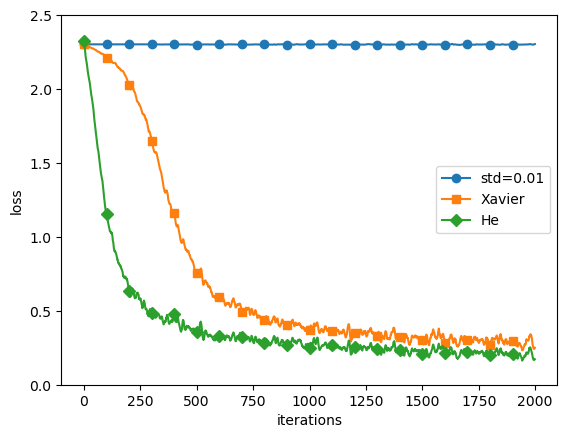

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet

# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()